<a href="https://colab.research.google.com/github/xFlodz/university/blob/main/%D0%94%D0%9F%D0%9E%20%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%968%20%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%D1%81%20%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%BC%D0%B8%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8%20%D0%B2%20GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №2. Работа с векторными данными в GeoPandas**

In [1]:
%%capture
!pip install geopandas leafmap mapclassify # Устанавливаем библиотеку GeoPandas и необходимые зависимости

## **Задание №1. Операции с массивами NumPy и геопространственными координатами**


1. Создайте двумерный массив NumPy, содержащий широту и долготу следующих городов: Токио (35.6895, 139.6917), Нью-Йорк (40.7128, -74.0060), Лондон (51.5074, -0.1278) и Париж (48.8566, 2.3522).


In [2]:
import numpy as np


city_degrees = np.array(
    [
        [35.6895, 139.6917],  # Токио
        [40.7128, -74.0060],  # Нью-Йорк
        [51.5074, -0.1278],  # Лондон
        [48.8566, 2.3522],  # Париж
    ]
)

city_degrees


array([[ 3.568950e+01,  1.396917e+02],
       [ 4.071280e+01, -7.400600e+01],
       [ 5.150740e+01, -1.278000e-01],
       [ 4.885660e+01,  2.352200e+00]])

2. Преобразуйте значения широты и долготы из градусов в радианы с помощью функции np.radians().


In [3]:
city_radians = np.radians(city_degrees)

city_radians


array([[ 6.22899283e-01,  2.43808010e+00],
       [ 7.10572408e-01, -1.29164837e+00],
       [ 8.98973719e-01, -2.23053078e-03],
       [ 8.52708531e-01,  4.10536347e-02]])



3. Рассчитайте поэлементную разницу между координатами Токио и других городов в радианах.

In [4]:
differences = city_radians[0] - city_radians[1:]

differences

array([[-0.08767312,  3.72972847],
       [-0.27607444,  2.44031063],
       [-0.22980925,  2.39702647]])

## **Задание 2. Операции с DataFrame Pandas и геопространственными данными**


1. Загрузите набор данных о городах мира по следующему URL с помощью Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv


In [5]:
import pandas as pd


url_data_cities = (
    "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
)

df_cities = pd.read_csv(url_data_cities)

df_cities

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


2. Отобразите первые 5 строк и проверьте наличие отсутствующих значений.


In [8]:
df_cities.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [9]:
df_cities.isna().sum()

,0
id,0
name,0
country,0
latitude,0
longitude,0
population,0


3. Отфильтруйте набор данных, чтобы включить только города с населением более 1 миллиона человек.


In [10]:
filter_df_cities = df_cities[df_cities["population"] > 1_000_000]

filter_df_cities

,id,name,country,latitude,longitude,population
97,98,Turin,ITA,45.07039,7.66996,1652000
103,104,Lille,FRA,50.64997,3.08001,1044000
123,124,San Bernardino,USA,34.12038,-117.30003,1745000
124,125,Bridgeport,USA,41.17998,-73.19996,1018000
126,127,Manchester,GBR,53.50042,-2.24799,2230000
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


4. Сгруппируйте города по странам и рассчитайте общую численность населения для каждой страны.


In [11]:
df_cities_by_country = filter_df_cities.groupby("country").agg(
    {
        "population": "sum",
    },
)

df_cities_by_country

,population
country,
AFG,3277000
AGO,6272900
ARE,1379000
ARG,15450000
ARM,1102000
...,...
VNM,11661000
YEM,2008000
ZAF,11738000




5. Отсортируйте города по населению в порядке убывания и отобразите первые 10 городов.

In [12]:
sort_filter_df_cities = filter_df_cities.sort_values(by='population', ascending=False)

sort_filter_df_cities.head(10)

,id,name,country,latitude,longitude,population
1239,1240,Tokyo,JPN,35.68502,139.75141,35676000
1224,1225,New York,USA,40.74998,-73.98002,19040000
1230,1231,Mexico City,MEX,19.44244,-99.13099,19028000
1240,1241,Mumbai,IND,19.01699,72.85699,18978000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1148,1149,Delhi,IND,28.66999,77.23000,15926000
1238,1239,Shanghai,CHN,31.21645,121.43650,14987000
1243,1244,Kolkata,IND,22.49497,88.32468,14787000
1175,1176,Dhaka,BGD,23.72306,90.40858,12797394
1217,1218,Buenos Aires,ARG,-34.60250,-58.39753,12795000


## **Задание №3. Создание и обработка GeoDataFrames с помощью GeoPandas**


1. Загрузите набор данных о зданиях Нью-Йорка из файла GeoJSON с помощью GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson

In [13]:
import geopandas as gpd

url_data_buildings = (
    "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
)

gdf_buildings = gpd.read_file(url_data_buildings)

gdf_buildings

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,2,15.05,23.30,19.18,6365.72,36,New York,"POLYGON ((-74.00129 40.71992, -74.00061 40.719..."
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
...,...,...,...,...,...,...,...,...
1201,9764,26.54,22.30,24.42,696.24,36,New York,"POLYGON ((-73.97463 40.72411, -73.97467 40.724..."
1202,9765,10.44,16.53,13.48,2859.96,36,New York,"POLYGON ((-73.98495 40.71911, -73.98436 40.718..."
1203,9766,10.44,13.87,12.16,2859.96,36,New York,"POLYGON ((-73.98495 40.71911, -73.98436 40.718..."
1204,9774,13.76,NaN,13.76,1612.84,36,New York,"POLYGON ((-73.99154 40.71045, -73.99173 40.710..."


2. Создайте график контуров зданий и раскрасьте их в зависимости от высоты здания (используйте столбец `height_MS`).


<Axes: >

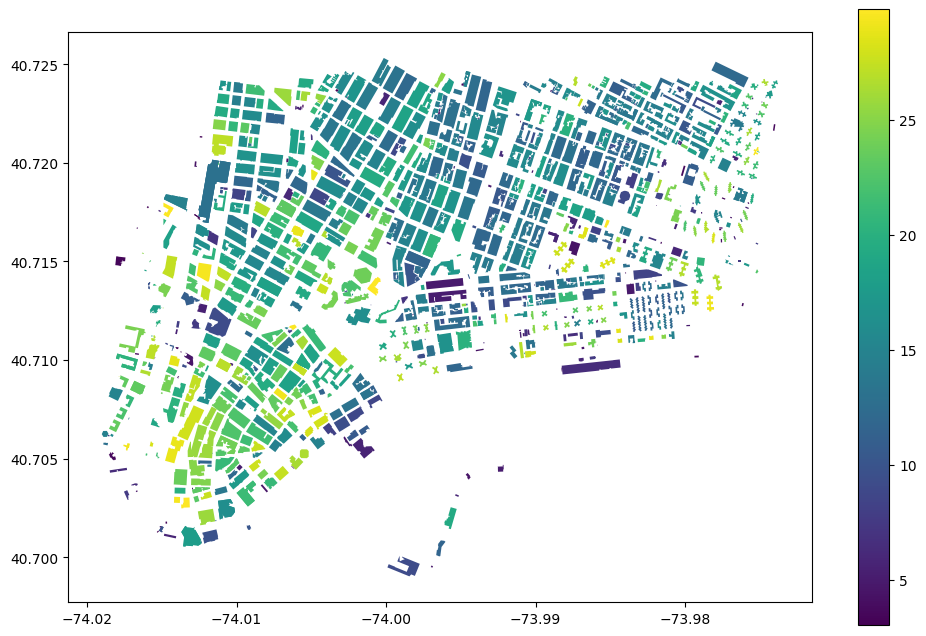

In [14]:
gdf_buildings.plot(
    column="height_MS",
    figsize=(12, 8),
    legend=True,
)


3. Создайте интерактивную карту контуров зданий и раскрасьте их в зависимости от высоты здания (используйте столбец `height_MS`).


In [15]:
gdf_buildings.explore(
    column="height_MS",
    legend=True,
)

4. Рассчитайте среднюю высоту зданий (используйте столбец `height_MS`).


In [16]:
mean_height = gdf_buildings["height_MS"].mean()

mean_height

np.float64(15.454691136974038)

5. Выберите здания с высотой, превышающей среднюю высоту.


In [17]:
tall_buildings = gdf_buildings[gdf_buildings["height_MS"] > mean_height]

tall_buildings

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
5,38,18.84,NaN,18.84,1151.88,36,New York,"POLYGON ((-74.01574 40.70672, -74.01537 40.706..."
...,...,...,...,...,...,...,...,...
1196,9714,19.90,19.15,19.52,1230.57,36,New York,"POLYGON ((-73.98328 40.71861, -73.9826 40.7184..."
1198,9752,19.35,NaN,19.35,4080.25,36,New York,"POLYGON ((-73.99528 40.70245, -73.99568 40.702..."
1199,9754,24.11,47.47,35.79,7137.13,36,New York,"POLYGON ((-74.00084 40.71547, -74.00075 40.715..."
1200,9756,16.20,15.17,15.68,166.41,36,New York,"POLYGON ((-73.99054 40.71271, -73.99045 40.712..."





6. Сохраните GeoDataFrame в новый файл GeoJSON.

In [18]:
tall_buildings.to_file("tall_buildings.geojson", driver="GeoJSON")

## **Задание №4. Применение NumPy, Pandas и GeoPandas для обработки и анализа пространственных данных**


1. Используйте Pandas для загрузки набора данных о городах мира по следующему URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv


In [19]:
import pandas as pd

url_data_cities = (
    "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
)

df_cities = pd.read_csv(url_data_cities)

df_cities

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


2. Отфильтруйте набор данных, чтобы включить только города с широтой между -40 и 60 (т.е. города, расположенные в Северном полушарии или вблизи экватора).


In [22]:
filter_df_cities = df_cities[
    (df_cities["latitude"] >= -40) &
    (df_cities["latitude"] <= 60)
]

filter_df_cities

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


3. Создайте GeoDataFrame из отфильтрованного набора данных, преобразовав широту и долготу в геометрии.


In [23]:
import geopandas as gpd


gdf_cities = gpd.GeoDataFrame(
    filter_df_cities,
    geometry=gpd.points_from_xy(
        filter_df_cities.longitude,
        filter_df_cities.latitude,
    ),
    crs="EPSG:4326"
)

gdf_cities.head()

,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.5833,32.5333,75000,POINT (32.5333 0.5833)
1,2,Fort Portal,UGA,0.6710,30.2750,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.6420,15.7990,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.5630,14.6560,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.7370,7.3150,34062,POINT (7.315 45.737)


4. Перепроецируйте GeoDataFrame в проекцию Меркатора (EPSG:3857).


In [24]:
gdf_3857 = gdf_cities.to_crs("EPSG:3857")

gdf_3857.head()

,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.5833,32.5333,75000,POINT (3621590.39 64933.781)
1,2,Fort Portal,UGA,0.6710,30.2750,42670,POINT (3370197.584 74697.086)
2,3,Potenza,ITA,40.6420,15.7990,69060,POINT (1758736.635 4959679.293)
3,4,Campobasso,ITA,41.5630,14.6560,50762,POINT (1631498.457 5095742.084)
4,5,Aosta,ITA,45.7370,7.3150,34062,POINT (814302.075 5738302.989)


5. Рассчитайте расстояние (в метрах) между каждым городом и Парижем.


In [25]:
paris_geom = gdf_3857[gdf_3857["name"] == "Paris"].iloc[0].geometry
print(paris_geom)

gdf_3857["distance_to_paris_m"] = gdf_3857.geometry.distance(paris_geom)

gdf_3857.head()

POINT (259746.22064757696 6252271.673730294)


,id,name,country,latitude,longitude,population,geometry,distance_to_paris_m
0,1,Bombo,UGA,0.5833,32.5333,75000,POINT (3621590.39 64933.781),7.041672e+06
1,2,Fort Portal,UGA,0.6710,30.2750,42670,POINT (3370197.584 74697.086),6.916454e+06
2,3,Potenza,ITA,40.6420,15.7990,69060,POINT (1758736.635 4959679.293),1.979335e+06
3,4,Campobasso,ITA,41.5630,14.6560,50762,POINT (1631498.457 5095742.084),1.794231e+06
4,5,Aosta,ITA,45.7370,7.3150,34062,POINT (814302.075 5738302.989),7.561058e+05




6. Отобразите города на карте мира, раскрасив точки в зависимости от их расстояния до Парижа.

<Axes: >

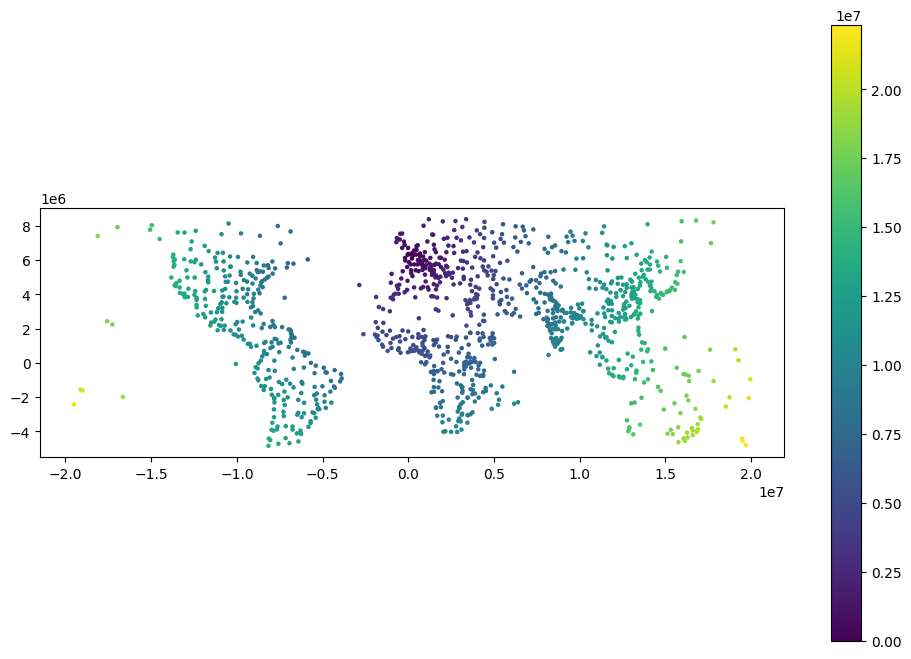

In [26]:
gdf_3857.plot(
    column="distance_to_paris_m",
    figsize=(12, 8),
    legend=True,
    markersize=5,
)